In [76]:
%store -r preprocessed_data
%store -r lemmatized_data
%store -r cleaned_data

**NLP with LDA**

In [5]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# # Vectorize the preprocessed data
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(preprocessed_data)

# # Apply LDA for topic modeling
# num_topics = 5  # Adjust the number of topics as needed
# lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
# lda.fit(X)

# # Print the top words for each topic
# def print_top_words(model, feature_names, n_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
#         top_words = [feature_names[i] for i in top_words_idx]
#         print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

# n_top_words = 5  # Adjust the number of top words to display
# print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)

Topic #1: wake premium night fall feel
Topic #2: heart rate sleeping resting problem
Topic #3: deep rem score stage device
Topic #4: wake forum feature idea sleeping
Topic #5: awake log setting restless work


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def get_top_words_for_topics(preprocessed_data, num_topics, n_top_words):
    # Vectorize the preprocessed data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(preprocessed_data)

    # Apply LDA for topic modeling
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)

    # Get the top words for each topic
    topics = []
    feature_names = vectorizer.get_feature_names_out()
    for topic in lda.components_:
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)

    return topics

topics = get_top_words_for_topics(preprocessed_data,5,10)

In [99]:
topics

[['wake',
  'premium',
  'night',
  'fall',
  'feel',
  'pm',
  'data',
  'tired',
  'work',
  'bedtime'],
 ['heart',
  'rate',
  'sleeping',
  'resting',
  'problem',
  'phone',
  'apnea',
  'doctor',
  'issue',
  'graph'],
 ['deep',
  'rem',
  'score',
  'stage',
  'device',
  'tracking',
  'graph',
  'data',
  'issue',
  'wrist'],
 ['wake',
  'forum',
  'feature',
  'idea',
  'sleeping',
  'work',
  'alarm',
  'moving',
  'great',
  'health'],
 ['awake',
  'log',
  'setting',
  'restless',
  'work',
  'data',
  'sensitive',
  'tracking',
  'tracker',
  'set']]

**Sentiment Analysis**

In [6]:
# import textblob
# from textblob import TextBlob

# # Analyze sentiment for each paragraph
# sentiments = [TextBlob(text).sentiment for text in preprocessed_data]
# sentiments2 = [TextBlob(text).sentiment for text in cleaned_data]
# sentiments

**WordCloud**

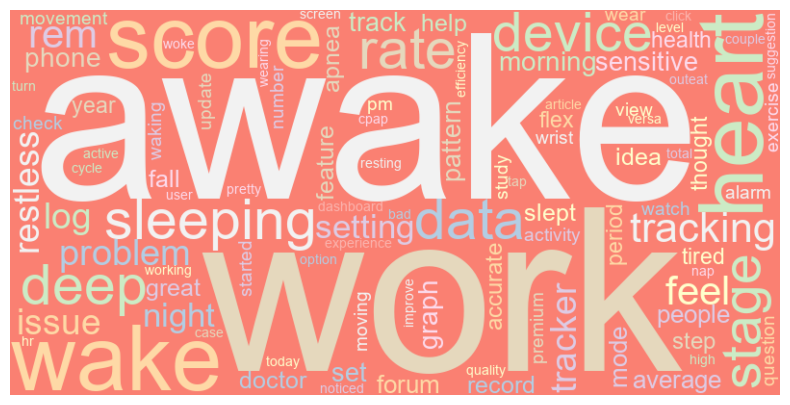

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS

# join text
your_text_corpus = ' '.join(preprocessed_data)


# Create a WordCloud object using the Arial font
wordcloud = WordCloud(width=800, height=400, background_color='salmon', max_words=100
                      , colormap='Pastel1', collocation_threshold=5, font_path='arial.ttf'
                      , collocations=False, stopwords = STOPWORDS).generate(your_text_corpus)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud.png')


In [79]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from heapq import nlargest
import nltk
nltk.download("stopwords")
# Load spaCy model
# download python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 3016807 # or even higher
doc = nlp('\n'.join(cleaned_data))
# Flatten the list of lists into a single list of words
flattened_tokens = [word for sublist in lemmatized_data for word in sublist]

# Calculate word frequency
word_freq = {}
for word in flattened_tokens:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Calculate sentence scores based on word frequency
sentence_scores = {}
for sent in doc.sents:
    for word in sent:
        if word.text in word_freq:
            if sent in sentence_scores:
                sentence_scores[sent] += word_freq[word.text]
            else:
                sentence_scores[sent] = word_freq[word.text]

# Get the top N sentences as the summary
summary_sentences = nlargest(3, sentence_scores, key=sentence_scores.get)

# Generate the summary
summary = " ".join([str(sentence) for sentence in summary_sentences])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dc78udot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
summary_sentences[1]

yet i got a slightly higher score of why is that well
the explanation is found in the breakdown this is the breakdown of the longer sleep rated here is the breakdown of the shorter sleep rated i got a lower partial score for the shorter night vs
as one would expect however
i got a far better restoration score on the shorter night
for spending of the time below rhr
vs only during the longer night what i dont quite understand is why i got the same partial score of for deep and rem in both cases
in spite of having nearly twice as much deep sleep during the longer night regardless
i find the sleep scores make sense overall
when you look at the breakdowns dominique finlandionic
aria
flyer
trendweight windows
os x motorola moto g android
ipad air ios take a look at the fitbit help site for further assistance and information i think zollistar nailed it with the response it could be any of those things that is messing with you feeling rested in the morning it could also be that whatever the da

In [97]:
# Minimum number of keywords a sentence should contain
min_keyword_count = 4

# List to store sentences that meet the criteria
filtered_sentences = []

# Iterate through each span (collection of sentences)
for span in summary_sentences:
    # Split the span into individual sentences using '\n' as the separator
    sentences = span.text.split('\n')

    # Iterate through each sentence in the span
    for sentence in sentences:
        # Convert the sentence to lowercase
        sentence_text = sentence.lower()

        # Count how many keywords in topics[0] are in the sentence
        keyword_count = sum(1 for keyword in topics[0] if keyword in sentence_text)

        # Check if the sentence contains at least the minimum number of keywords
        if keyword_count >= min_keyword_count:
            filtered_sentences.append((sentence, keyword_count))

# Sort the filtered sentences by keyword_count in descending order
filtered_sentences.sort(key=lambda x: x[1], reverse=True)

# Create a list of sorted sentences without printing
sorted_sentences = [sentence for sentence, keyword_count in filtered_sentences]

# Now 'sorted_sentences' contains the relevant sentences, sorted by keyword count.


In [98]:
filtered_sentences

[('but based on what my fitbit reports and how i feel there seems to be a decent pattern it is a tool and not a major medical device i do think the trends over time can be helpful to show a medical professional as it is some easy data to have when asked heyi thought my fitbit charge hr was supposed to track my lowest heart rate leveli woke up last night a few times and i saw far lesser readingsi have been reading about how the rest heart rate might be higher asleep than awake yet i did see numbers like',
  4),
 ('it wont get the missing data back that has disappeared into the ether rs same kind of thing here i have a feeling my charge confuses rem with awake times there is no way i could be awake that much during the night ten minutes at a time for example and not know it its always set on normal not sensitive',
  4)]

In [10]:
# sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
# sorted_word_freq

{'awake': 1232,
 'work': 1205,
 'wake': 1032,
 'heart': 1009,
 'score': 993,
 'sleeping': 977,
 'deep': 963,
 'rate': 955,
 'data': 948,
 'device': 872,
 'stage': 871,
 'tracking': 759,
 'feel': 741,
 'rem': 729,
 'problem': 718,
 'log': 691,
 'issue': 689,
 'restless': 688,
 'tracker': 680,
 'setting': 670,
 'night': 659,
 'morning': 641,
 'phone': 619,
 'graph': 606,
 'track': 564,
 'set': 555,
 'sensitive': 548,
 'pattern': 539,
 'forum': 517,
 'people': 514,
 'average': 503,
 'mode': 493,
 'slept': 466,
 'record': 460,
 'doctor': 454,
 'feature': 450,
 'help': 443,
 'great': 432,
 'apnea': 428,
 'fall': 423,
 'idea': 422,
 'accurate': 398,
 'step': 390,
 'flex': 372,
 'tired': 371,
 'health': 370,
 'thought': 364,
 'period': 364,
 'year': 364,
 'movement': 358,
 'activity': 357,
 'wrist': 352,
 'check': 351,
 'premium': 350,
 'study': 348,
 'question': 343,
 'wear': 339,
 'waking': 333,
 'watch': 324,
 'number': 319,
 'alarm': 305,
 'update': 305,
 'pm': 303,
 'moving': 302,
 'star

In [11]:
with open("summary.txt", 'w', encoding='utf-8') as file:
    # Write the string to the file
    file.write(summary)